# PROBLEM 1

## Austo Motor Company is a leading car manufacturer specializing in SUV, Sedan, and Hatchback models. In its recent board meeting, the members raised concerns about the efficiency of the marketing campaign currently being used. The board decides to rope in an analytics professional to improve the existing campaign.As an analyst hired by the company, you have been tasked with performing a thorough analysis of the data and coming up with insights to improve the marketing campaign.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [2]:
df = pd.read_csv("C:\\Users\\hp\\Desktop\\Great Lakes Python\\Projects\\Apr'23\\Stats\\austo_automobile+(2)+(1).csv",encoding= 'unicode_escape')

### A.	What is the important technical information about the dataset that a database administrator would be interested in?

In [3]:
x,y = df.shape
print("No of Rows :", x)
print("No of Columns :", y)

No of Rows : 1581
No of Columns : 14


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.0+ KB


### B.	Take a critical look at the data and do a preliminary analysis of the variables. Do a quality check of the data so that the variables are consistent. Are there any discrepancies present in the data? If yes, perform preliminary treatment of data.

In [5]:
df.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV


In [6]:
df.tail()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
1576,22,Male,Salaried,Single,Graduate,2,No,Yes,No,33300,0.0,33300,27000,Hatchback
1577,22,Male,Business,Married,Graduate,4,No,No,No,32000,NaN,32000,31000,Hatchback
1578,22,Male,Business,Single,Graduate,2,No,Yes,No,32900,0.0,32900,30000,Hatchback
1579,22,Male,Business,Married,Graduate,3,Yes,Yes,No,32200,NaN,32200,24000,Hatchback
1580,22,Male,Salaried,Married,Graduate,4,No,No,No,31600,0.0,31600,31000,Hatchback


In [7]:
df.isnull().sum()

Age                   0
Gender               53
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1581.0,31.922201,8.425978,22.0,25.0,29.0,38.0,54.0
No_of_Dependents,1581.0,2.457938,0.943483,0.0,2.0,2.0,3.0,4.0
Salary,1581.0,60392.220114,14674.825044,30000.0,51900.0,59500.0,71800.0,99300.0
Partner_salary,1475.0,20225.559322,19573.149277,0.0,0.0,25600.0,38300.0,80500.0
Total_salary,1581.0,79625.996205,25545.857768,30000.0,60500.0,78000.0,95900.0,171000.0
Price,1581.0,35597.722960,13633.636545,18000.0,25000.0,31000.0,47000.0,70000.0


In [9]:
df.describe(include="object")

,Gender,Profession,Marital_status,Education,Personal_loan,House_loan,Partner_working,Make
count,1528,1581,1581,1581,1581,1581,1581,1581
unique,4,2,2,2,2,2,2,3
top,Male,Salaried,Married,Post Graduate,Yes,No,Yes,Sedan
freq,1199,896,1443,985,792,1054,868,702


In [10]:
for i in df.select_dtypes("object"):
    print(df[i].value_counts())

Male      1199
Female     327
Femal        1
Femle        1
Name: Gender, dtype: int64
Salaried    896
Business    685
Name: Profession, dtype: int64
Married    1443
Single      138
Name: Marital_status, dtype: int64
Post Graduate    985
Graduate         596
Name: Education, dtype: int64
Yes    792
No     789
Name: Personal_loan, dtype: int64
No     1054
Yes     527
Name: House_loan, dtype: int64
Yes    868
No     713
Name: Partner_working, dtype: int64
Sedan        702
Hatchback    582
SUV          297
Name: Make, dtype: int64


In [11]:
#Replacing the misspelled field in Gender column wih correct information

df['Gender'].replace(['Femal','Femle'],'Female',inplace=True)

In [12]:
#Checking Mode of Gender column

df["Gender"].value_counts()

Male      1199
Female     329
Name: Gender, dtype: int64

In [13]:
#Imputing the missing fields with Mode of Gender column

df['Gender'].fillna('Male',axis=0,inplace=True)

In [14]:
# Total Salary is the sum of Customer Salary and Partner Salary

df['Partner_salary'].fillna(df['Total_salary']-df['Salary'],axis=0,inplace=True)

In [15]:
#Checking if any duplicate rows present in the dataset

df[df.duplicated()]

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make


In [16]:
#Cross checking if missing values are filled with appropriate data

df.isnull().sum()

Age                 0
Gender              0
Profession          0
Marital_status      0
Education           0
No_of_Dependents    0
Personal_loan       0
House_loan          0
Partner_working     0
Salary              0
Partner_salary      0
Total_salary        0
Price               0
Make                0
dtype: int64

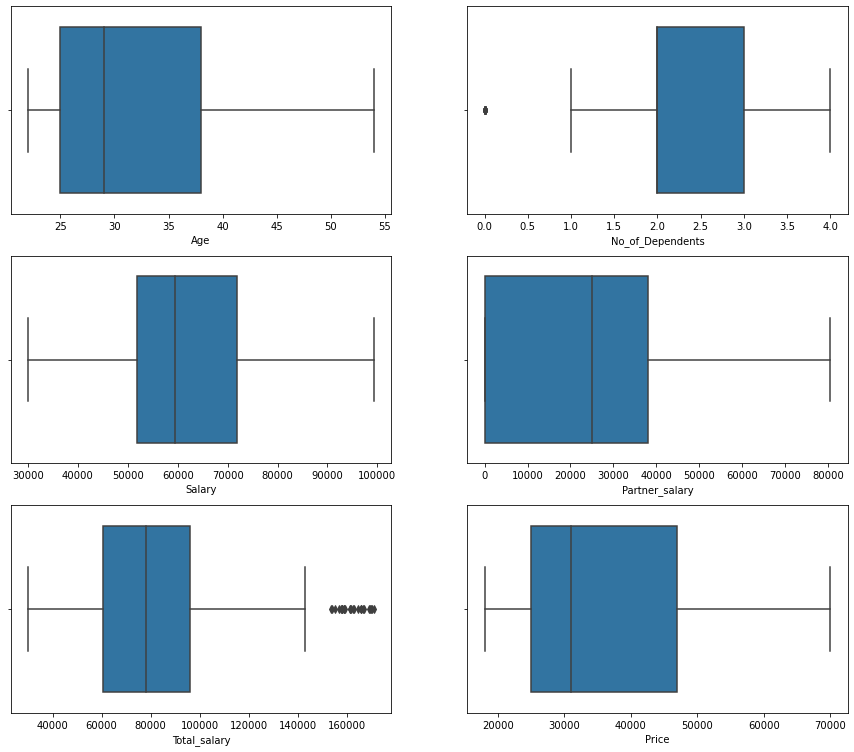

In [17]:
#Creating Box-Plots for all numerical columns to identify Outliers
fig, axis = plt.subplots(3,2, figsize = (15,13))
x = 0
y = 0
for i in df.select_dtypes(['float64','int64']).columns:
    sns.boxplot(x = i, data = df, ax = axis[x,y])
    y += 1
    if y > 1:
        x += 1
        y = 0

In [18]:
# Checking no of Outliers in Total Salary column

x, y = np.quantile(df["Total_salary"],[0.25,0.75])
iqr = y - x
upper_range = y + (1.5 * iqr)

outlier_row = df[df["Total_salary"] > upper_range].shape[0]
print("Number of Outliers in Total Salary column :", outlier_row)

Number of Outliers in Total Salary column : 27


In [19]:
# Treating Outliers in Total_salary column

df["Total_salary"] = np.where(df["Total_salary"] > upper_range, upper_range,df["Total_salary"])

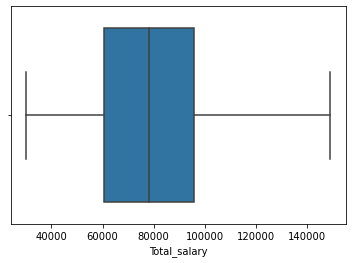

In [20]:
#Checking Box Plot of Total Salary post outilier treatment

sns.boxplot(x="Total_salary",data=df);

### C. Explore all the features of the data separately by using appropriate visualizations and draw insights that can be utilized by the business.

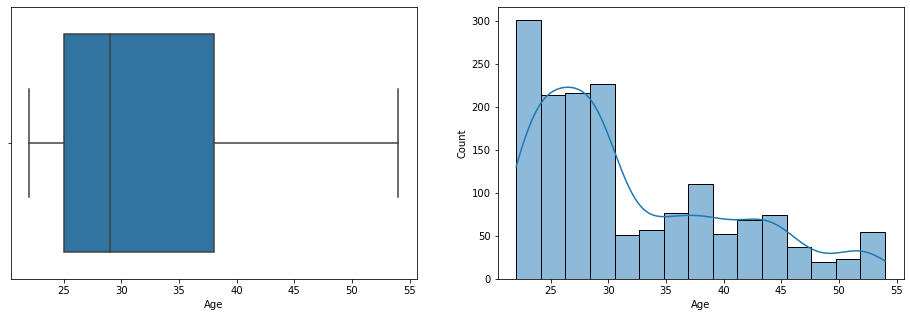

In [21]:
# Univariate Analysis for Age column

fig, axis = plt.subplots(1,2, figsize = (16,5))

sns.boxplot(x = "Age", data = df, ax = axis[0])

sns.histplot(x = "Age", data=df, kde=True, ax = axis[1])
plt.show()

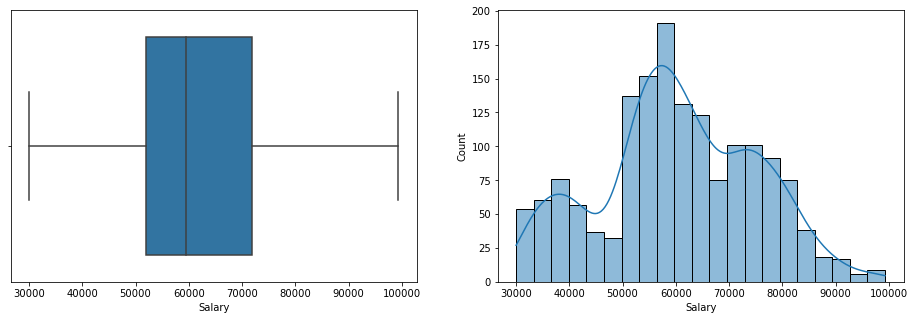

In [22]:
#Univariate Analysis for Salary column

fig, axis = plt.subplots(1,2, figsize = (16,5))

sns.boxplot(x="Salary", data=df, ax=axis[0])

sns.histplot(x="Salary", data=df, kde=True, ax=axis[1])
plt.show()

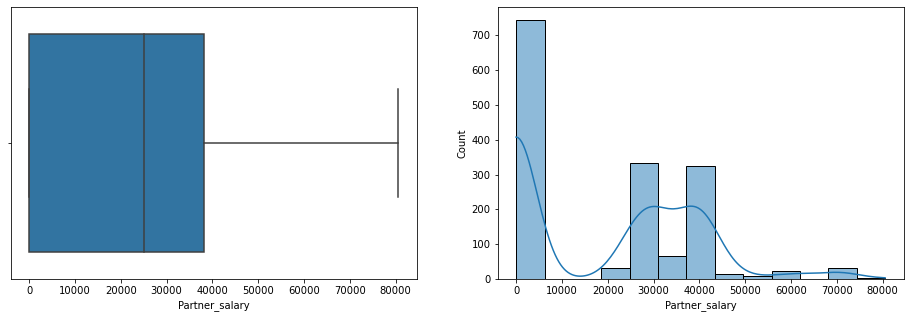

In [23]:
#Univariate Analysis for Partner Salary column

fig, axis = plt.subplots(1,2, figsize = (16,5))

sns.boxplot(x="Partner_salary", data=df, ax=axis[0])

sns.histplot(x="Partner_salary", data=df, kde=True, ax=axis[1])
plt.show()

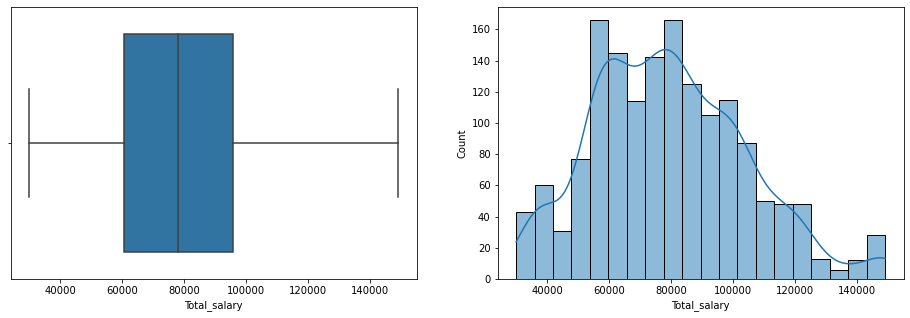

In [24]:
#Univariate Analysis for Total Salary column

fig, axis = plt.subplots(1,2, figsize = (16,5))

sns.boxplot(x="Total_salary", data=df, ax=axis[0])

sns.histplot(x="Total_salary", data=df, kde=True, ax=axis[1])
plt.show()

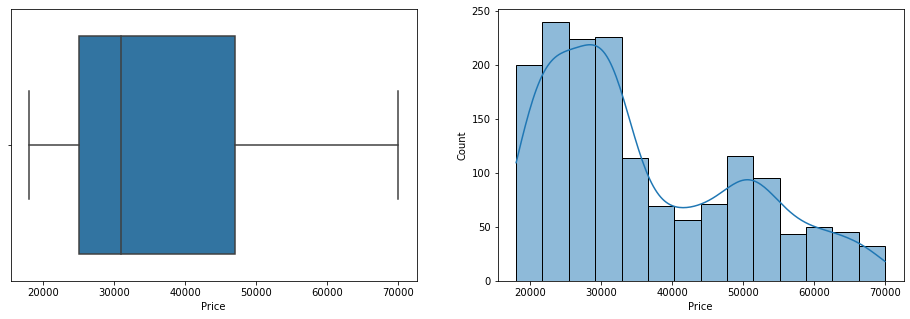

In [25]:
#Univariate Analysis for Price column

fig, axis = plt.subplots(1,2, figsize = (16,5))

sns.boxplot(x="Price", data=df, ax=axis[0])

sns.histplot(x="Price", data=df, kde=True, ax=axis[1])
plt.show()

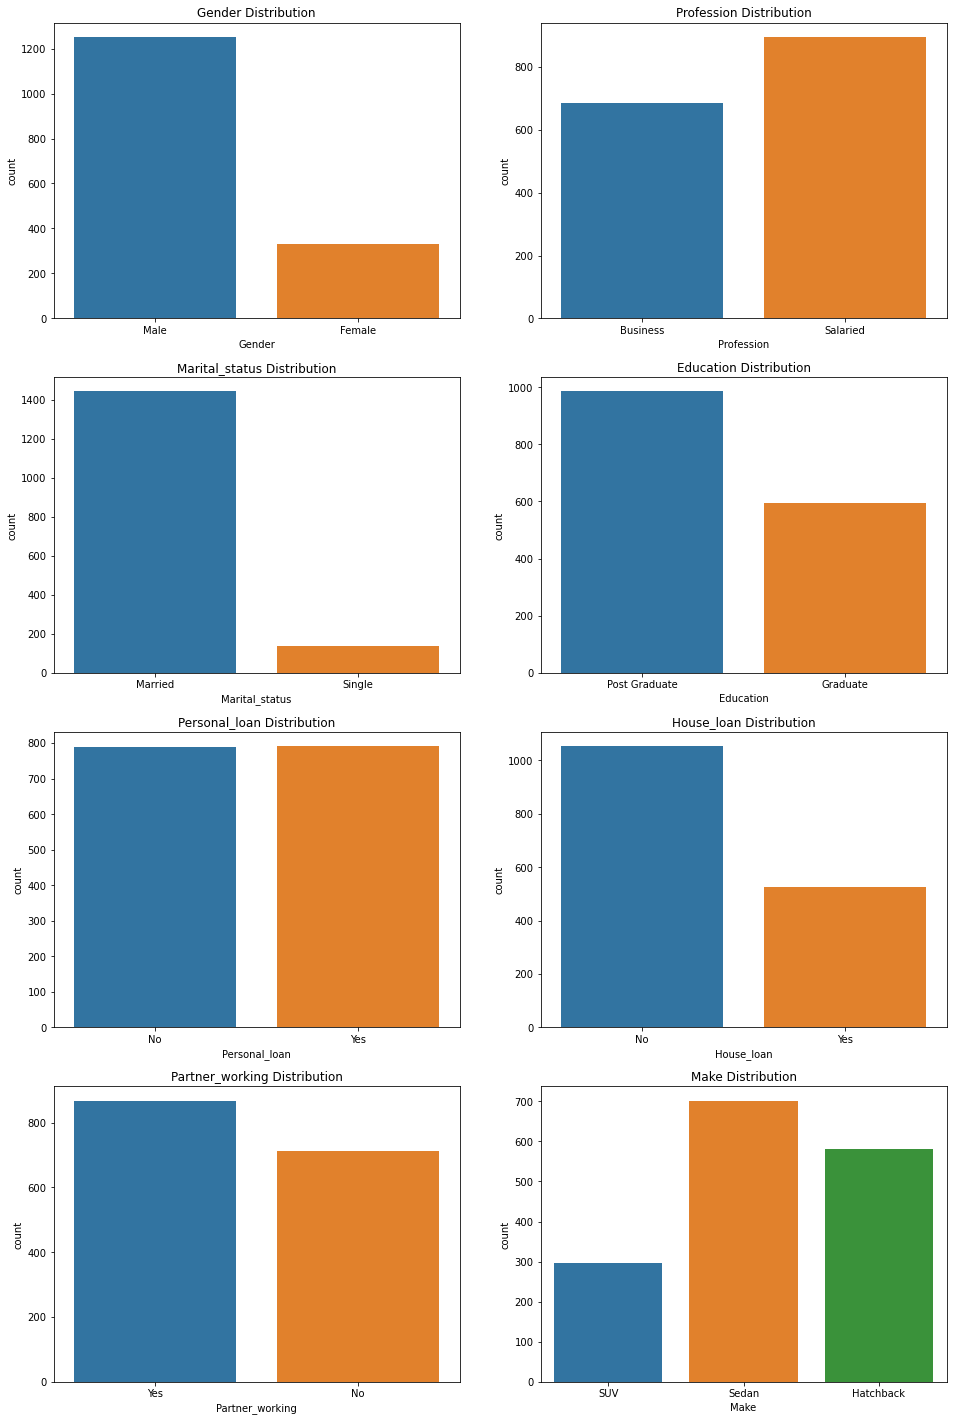

In [26]:
#Univariate Analysis for Categorical columns

fig, axis = plt.subplots(4,2, figsize=(16,25))
x = 0
y = 0

for i in df.select_dtypes("object").columns:
    sns.countplot(x=i, data=df, ax=axis[x,y])
    axis[x,y].set_title(i + " Distribution")
    y += 1
    
    if y > 1:
        x += 1
        y = 0

In [27]:
#Checking Percentage of Partners working in the dataset

(df["Partner_working"].value_counts()/df.shape[0])*100

Yes    54.901961
No     45.098039
Name: Partner_working, dtype: float64

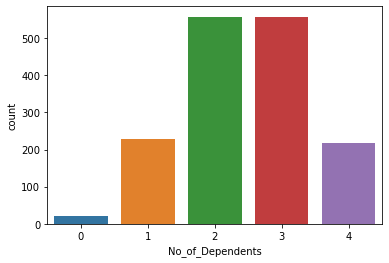

In [28]:
#Univariate Analysis for No of Dependents

sns.countplot(x="No_of_Dependents", data=df);

In [29]:
#Checking Percentage of No of Dependents

(df.No_of_Dependents.value_counts()/df.shape[0])*100

3    35.230867
2    35.230867
1    14.484503
4    13.788741
0     1.265022
Name: No_of_Dependents, dtype: float64

### D. Understanding the relationships among the variables in the dataset is crucial for every analytical project. Perform analysis on the data fields to gain deeper insights. Comment on your understanding of the data.

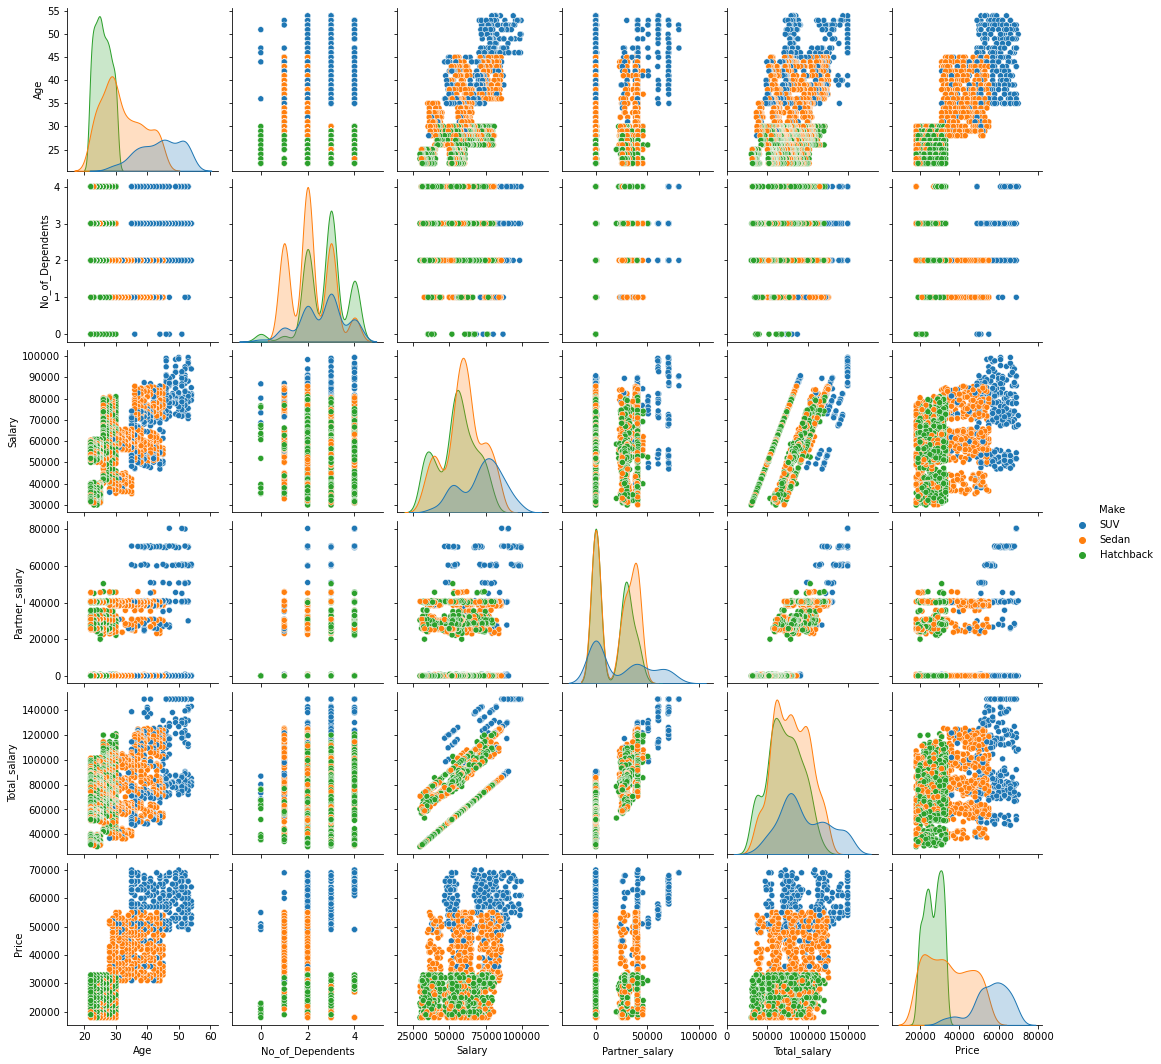

In [30]:
#Multivariate Analysis

sns.pairplot(df, hue="Make");

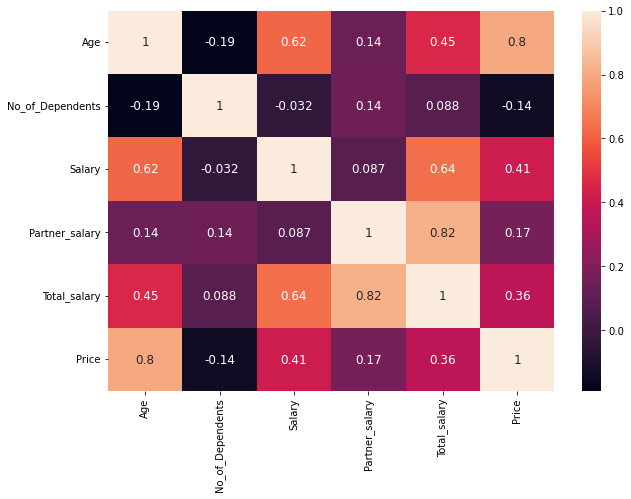

In [31]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, annot_kws={"size":12})
plt.xticks(rotation = 90)
plt.yticks(rotation = 360)
plt.show()

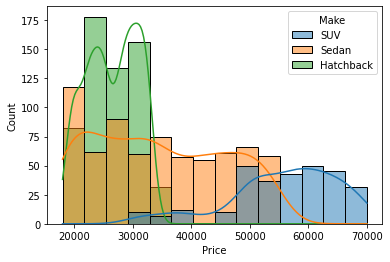

In [32]:
#Bi-variate Analysis for Price vs Make

sns.histplot(x="Price", data=df, kde=True, hue="Make");

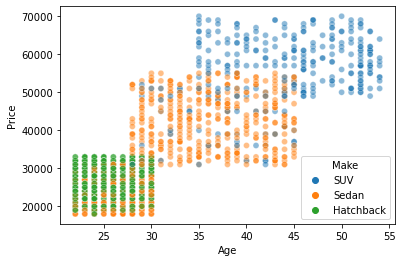

In [33]:
#Multi variate analysis for Price vs Age vs Make

sns.scatterplot(x="Age",y="Price", data=df, hue="Make", alpha = 0.5);

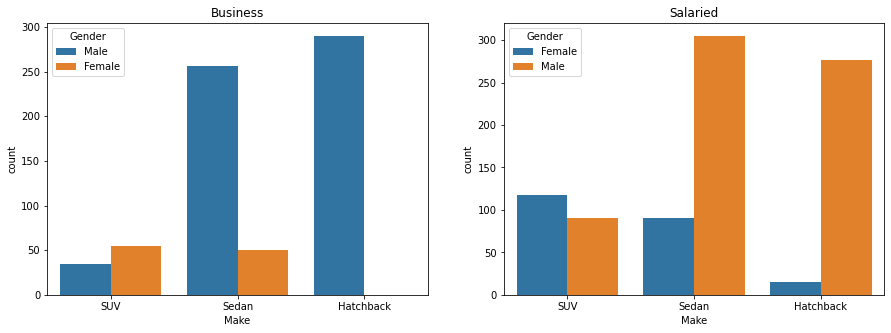

In [34]:
#Multi variate analysis for Profession vs Make vs Gender

fig, axis = plt.subplots(1,2, figsize=(15,5))
sns.countplot(x="Make", data = df[df["Profession"] == "Business"], hue="Gender", ax=axis[0] )
sns.countplot(x="Make", data = df[df["Profession"] == "Salaried"], hue="Gender", ax=axis[1] )
axis[0].set_title("Business")
axis[1].set_title("Salaried")
plt.show()

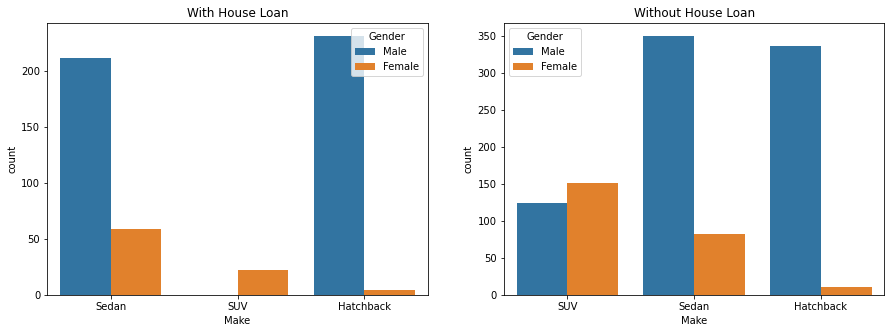

In [35]:
#Multi variate analysis for House loan vs Make vs Gender

fig, axis = plt.subplots(1,2, figsize=(15,5))
sns.countplot(x="Make", data = df[df["House_loan"] == "Yes"], hue="Gender", ax=axis[0] )
sns.countplot(x="Make", data = df[df["House_loan"] == "No"], hue="Gender", ax=axis[1] )
axis[0].set_title("With House Loan")
axis[1].set_title("Without House Loan")
plt.show()

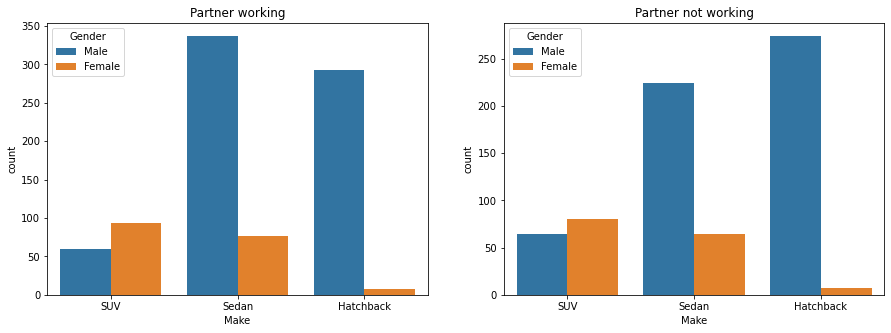

In [36]:
#Multi variate analysis for House loan vs Make vs Gender

fig, axis = plt.subplots(1,2, figsize=(15,5))
sns.countplot(x="Make", data = df[df["Partner_working"] == "Yes"], hue="Gender", ax=axis[0] )
sns.countplot(x="Make", data = df[df["Partner_working"] == "No"], hue="Gender", ax=axis[1] )
axis[0].set_title("Partner working")
axis[1].set_title("Partner not working")
plt.show()

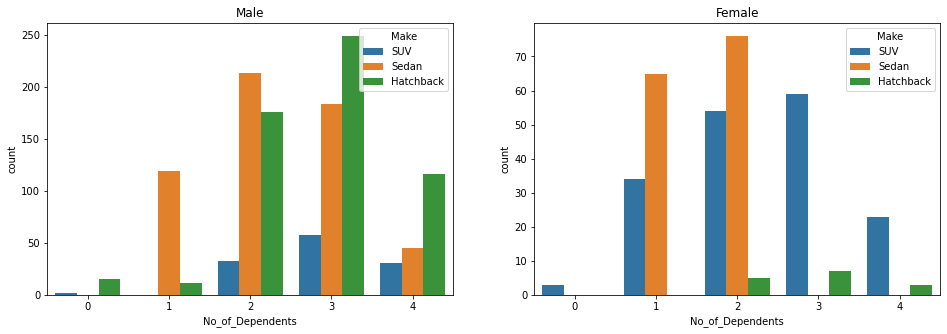

In [37]:
#Multi variate analysis for No of Dependents vs Make vs Gender

fig, axis = plt.subplots(1,2, figsize=(16,5))
sns.countplot(x="No_of_Dependents", data = df[df["Gender"] == "Male"], hue="Make", ax=axis[0] )
sns.countplot(x="No_of_Dependents", data = df[df["Gender"] == "Female"], hue="Make", ax=axis[1] )
axis[0].set_title("Male")
axis[1].set_title("Female")
plt.show()

### E. Employees working on the existing marketing campaign have made the following remarks. Based on the data and your analysis state whether you agree or disagree with their observations. Justify your answer Based on the data available.

#### E1) STEVE ROGER SAYS “MEN PREFER SUV BY A LARGE MARGIN, COMPARED TO THE WOMEN”

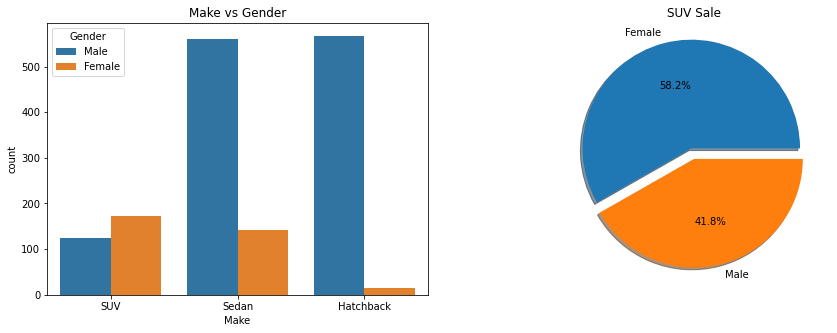

In [38]:
#Gender vs Make and SUV Sale

suv_gender_purchase = df[df["Make"]=="SUV"]["Gender"].value_counts()

fig, axis = plt.subplots(1,2, figsize=(15,5))

sns.countplot(x="Make", data=df, hue="Gender", ax=axis[0])
plt.pie(suv_gender_purchase,
        explode=[0.1,0],
        autopct='%1.1f%%',
        shadow=True,
        labels=suv_gender_purchase.index)
axis[0].set_title("Make vs Gender")
axis[1].set_title("SUV Sale")

plt.show()

In [39]:
# Percentage of SUV purchase based on Gender population

(suv_gender_purchase/df["Gender"].value_counts())*100

Female    52.583587
Male       9.904153
Name: Gender, dtype: float64

#### E2) Ned Stark believes that a salaried person is more likely to buy a Sedan. 

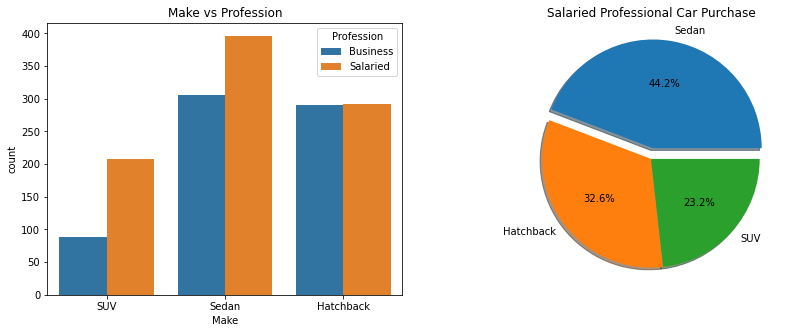

In [40]:
#Profession vs Make and Salaried Professional Car Preference

sedan_salaried_purchase = df[df["Profession"] == "Salaried"]["Make"].value_counts()

fig, axis = plt.subplots(1,2, figsize=(14,5))
sns.countplot(x="Make", data=df, hue="Profession", ax=axis[0])

plt.pie(sedan_salaried_purchase,
        explode=[0.1,0,0],
        autopct='%1.1f%%',
        shadow=True,
        labels = sedan_salaried_purchase.index)

axis[0].set_title("Make vs Profession")
axis[1].set_title("Salaried Professional Car Purchase")
plt.show()

#### E3) Sheldon Cooper does not believe any of them; he claims that a salaried male is an easier target for a SUV sale over a Sedan Sale.

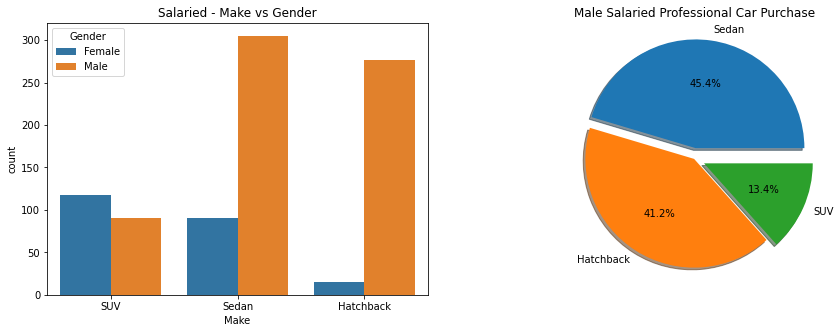

In [41]:
# Salaried - Make vs Gender and Salaried Male Car Preference

salaried_male_purchase = df[(df["Profession"] == "Salaried") & (df["Gender"] == "Male")]["Make"].value_counts()

fig, axis = plt.subplots(1,2, figsize=(15,5))

sns.countplot(x="Make", data = df[df["Profession"] == "Salaried"], hue="Gender", ax=axis[0] )

plt.pie(salaried_male_purchase,
        explode=[0.1,0,0.1],
        autopct='%1.1f%%',
        shadow=True,
        labels=salaried_male_purchase.index)

axis[0].set_title("Salaried - Make vs Gender")
axis[1].set_title("Male Salaried Professional Car Purchase")
plt.show()

###  F. From the given data, comment on the amount spent on purchasing automobiles across the following categories. Comment on how a Business can utilize the results from this exercise. Give justification along with presenting metrics/charts used for arriving at the conclusions. Give justification along with presenting metrics/charts used for arriving at the conclusions.

#### F1) Gender 

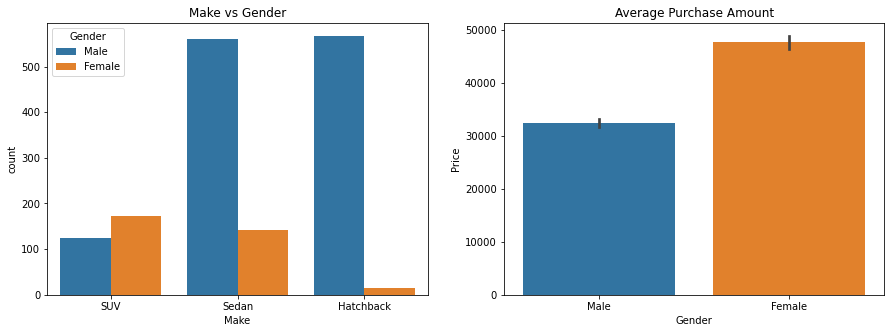

In [42]:
# Analyzing total sales based on Gender

fig, axis = plt.subplots(1,2, figsize=(15,5))

sns.countplot(x="Make", data=df, hue="Gender", ax=axis[0])
sns.barplot(x="Gender",y="Price",data=df, ax=axis[1])
axis[0].set_title("Make vs Gender")
axis[1].set_title("Average Purchase Amount")
plt.show()

In [43]:
#Statistical data for Personal Loan

df.groupby("Gender")["Price"].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,329.0,47705.167173,11244.836378,20000.0,38000.0,49000.0,55000.0,69000.0
Male,1252.0,32416.134185,12366.253107,18000.0,23000.0,29000.0,37000.0,70000.0


In [44]:
#Percentage of Females & Males

(df["Gender"].value_counts()/df.shape[0])*100

Male      79.190386
Female    20.809614
Name: Gender, dtype: float64

####  F2) Personal_loan

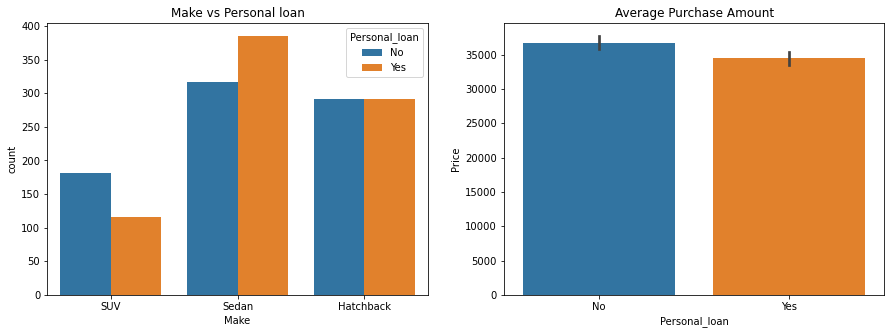

In [45]:
# Analyzing total sales based on Personal loan

fig, axis = plt.subplots(1,2, figsize=(15,5))

sns.countplot(x="Make", data=df, hue="Personal_loan", ax=axis[0])
sns.barplot(x="Personal_loan",y="Price",data=df, ax=axis[1])
axis[0].set_title("Make vs Personal loan")
axis[1].set_title("Average Purchase Amount")
plt.show()

In [46]:
#Statistical data for Personal Loan

df.groupby("Personal_loan")["Price"].describe()

,count,mean,std,min,25%,50%,75%,max
Personal_loan,,,,,,,,
No,789.0,36742.712294,14534.344526,18000.0,25000.0,32000.0,49000.0,70000.0
Yes,792.0,34457.070707,12578.780338,18000.0,24000.0,31000.0,45000.0,70000.0


### G. From the current data set comment if having a working partner leads to purchase of a higher priced car. 

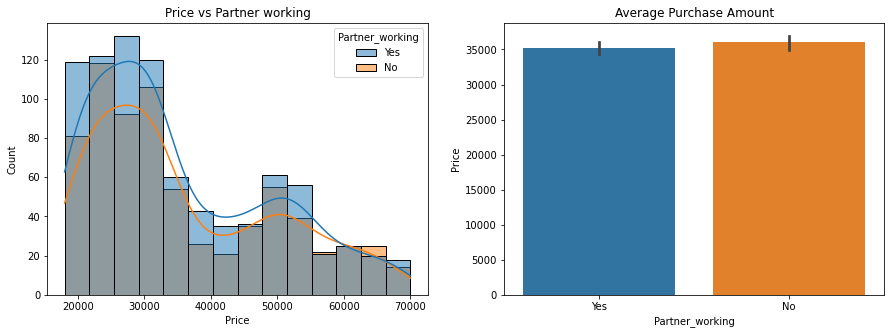

In [47]:
# Analyzing if Working Partners can lead to purchase of expensive cars

fig, axis = plt.subplots(1,2, figsize=(15,5))

sns.histplot(x="Price", data=df, hue="Partner_working", kde=True, ax=axis[0])

sns.barplot(x="Partner_working", y="Price", data=df, ax=axis[1])
axis[0].set_title("Price vs Partner working")
axis[1].set_title("Average Purchase Amount")
plt.show()

In [48]:
#Statistical data for Partner working

df.groupby("Partner_working")["Price"].describe()

,count,mean,std,min,25%,50%,75%,max
Partner_working,,,,,,,,
No,713.0,36000.000000,13817.734086,18000.0,25000.0,31000.0,48000.0,70000.0
Yes,868.0,35267.281106,13479.532555,18000.0,24000.0,31000.0,46000.0,70000.0


### H. The main objective of this analysis is to devise an improved marketing strategy to send targeted information to different groups of potential buyers present in the data. For the current analysis use Gender and Marital_status - fields to arrive at groups with similar purchase history.

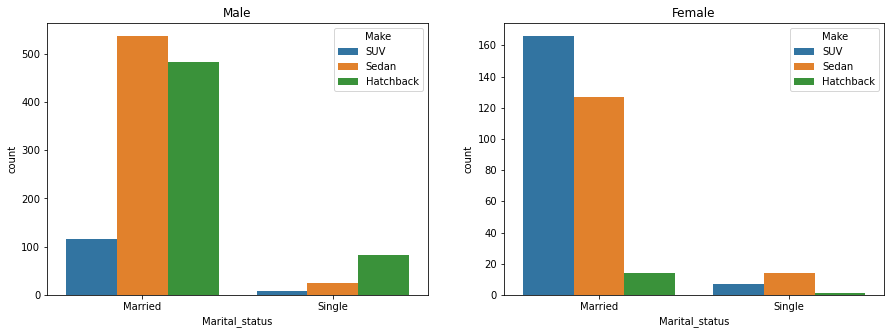

In [50]:
#Marital status vs Make vs Gender

fig, axis = plt.subplots(1,2, figsize=(15,5))

sns.countplot(x="Marital_status", data=df[df["Gender"]=="Male"], hue="Make", ax=axis[0])

sns.countplot(x="Marital_status", data=df[df["Gender"]=="Female"], hue="Make", ax=axis[1])
axis[0].set_title("Male")
axis[1].set_title("Female")
plt.show()

# PROBLEM 2

## A physiotherapist with a male football team is interested in studying the relationship between foot injuries and the positions at which the players play from the data collected 

### 2.1 What is the probability that a randomly chosen player would suffer an injury?

In [51]:
a = 145/235

print("Probability of randomly chosen player would suffer an injury is - {:0.2f}%".format(a*100))

Probability of randomly chosen player would suffer an injury is - 61.70%


### 2.2 What is the probability that a player is a forward or a winger?

In [52]:
a = (94/235)+(29/235)

print("Probability that a Player is a forward or a winger is - {:0.2f}%".format(a*100))

Probability that a Player is a forward or a winger is - 52.34%


### 2.3 What is the probability that a randomly chosen player plays in a striker position and has a foot injury?

In [53]:
a = 45/235

print("Probability that a randomly chosen player plays in a striker position and has a foot injury is - {:0.2f}%".format(a*100))

Probability that a randomly chosen player plays in a striker position and has a foot injury is - 19.15%


### 2.4 What is the probability that a randomly chosen injured player is a striker?

In [54]:
a = 45/145

print("Probability that a randomly chosen injured player is a striker is - {:0.2f}%".format(a*100))

Probability that a randomly chosen injured player is a striker is - 31.03%


### 2.5 What is the probability that a randomly chosen injured player is either a forward or an attacking midfielder?  

In [55]:
a = (56/145)+(24/145)

print("Probability that a randomly chosen injured player is either a forward or an attacking midfielder is - {:0.2f}%".format(a*100))

Probability that a randomly chosen injured player is either a forward or an attacking midfielder is - 55.17%


# PROBLEM 3

## An independent research organization is trying to estimate the probability that an accident at a nuclear power plant will result in radiation leakage. The types of accidents possible at the plant are, fire hazards, mechanical failure, or human error. The research organization also knows that two or more types of accidents cannot occur simultaneously.

## According to the studies carried out by the organization, the probability of a radiation leak in case of a fire is 20%, the probability of a radiation leak in case of a mechanical 50%, and the probability of a radiation leak in case of a human error is 10%. The studies also showed the following;

## The probability of a radiation leak occurring simultaneously with a fire is 0.1%.
## The probability of a radiation leak occurring simultaneously with a mechanical failure is 0.15%.
## The probability of a radiation leak occurring simultaneously with a human error is 0.12%.
## On the basis of the information available, answer the questions below:

### 3.1 What are the probabilities of a fire, a mechanical failure, and a human error respectively?

First Part of question:
P(R|F) = 0.2
P(R|M) = 0.5
P(R|HE) = 0.1

Second Part of question:
P(F and R) = 0.001
P(M and R) = 0.0015
P(HE and R) = 0.0012

In [56]:
#P(F) = P(F and R)/P(R|F)

pf = 0.001/0.2

print("Probability of Fire is - {:0.2f}%".format(pf*100))

Probability of Fire is - 0.50%


In [57]:
#P(M) = P(M and R)/P(R|M)

pm = 0.0015/0.5

print("Probability of Mechanical Failure is - {:0.2f}%".format(pm*100))

Probability of Mechanical Failure is - 0.30%


In [58]:
#P(HE) = P(HE and R)/P(R|HE)

phe = 0.0012/0.1

print("Probability of Human Error is - {:0.2f}%".format(phe*100))

Probability of Human Error is - 1.20%


### 3.2 What is the probability of a radiation leak?

In [59]:
#P(R) = P(F and R) + P(M and R) + P(HE and R)

pr = 0.001+0.0015+0.0012

print("Probability of Radiation Leak is - {:0.2f}%".format(pr*100))

Probability of Radiation Leak is - 0.37%


### 3.3 Suppose there has been a radiation leak in the reactor for which the definite cause is not known. What is the probability that it has been caused by:

### A Fire.
### A Mechanical Failure.
### A Human Error. 

In [60]:
#P(F|R) = P(F and R)/P(R)

pfr = 0.001/0.0037

print("Probability of Fire given Radiation Leak is - {:0.2f}%".format(pfr*100))

Probability of Fire given Radiation Leak is - 27.03%


In [61]:
#P(M|R) = P(M and R)/P(R)

pmr = 0.0015/0.0037

print("Probability of Mechanical Failure given Radiation Leak is - {:0.2f}%".format(pmr*100))

Probability of Mechanical Failure given Radiation Leak is - 40.54%


In [62]:
#P(HE|R) = P(HE and R)/P(R)

pher = 0.0012/0.0037

print("Probability of Human Error given Radiation Leak is - {:0.2f}%".format(pher*100))

Probability of Human Error given Radiation Leak is - 32.43%


# PROBLEM 4

## The breaking strength of gunny bags used for packaging cement is normally distributed with a mean of 5 kg per sq. centimeter and a standard deviation of 1.5 kg per sq. centimeter. The quality team of the cement company wants to know the following about the packaging material to better understand wastage or pilferage within the supply chain; Answer the questions below based on the given information; (Provide an appropriate visual representation of your answers, without which marks will be deducted) 

### 4.1 What proportion of the gunny bags have a breaking strength less than 3.17 kg per sq cm?

Mean = 5
SD = 1.5

Proportion of the gunny bags having a breaking strength less than 3.17 kg per sq cm - 11.12%


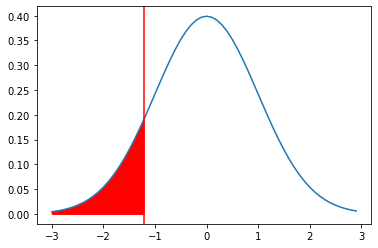

In [63]:
z1 = (3.17 - 5)/1.5

p = stats.norm.cdf(z1)

print("Proportion of the gunny bags having a breaking strength less than 3.17 kg per sq cm is- {:0.2f}%".format(p*100))

x = np.arange(-3,3,0.1)
y = stats.norm.pdf(x)
v = np.linspace(x.min(),z1)
plt.plot(x,y)
plt.axvline(z1,c='r')
plt.fill_between(v,stats.norm.pdf(v), color = 'r')
plt.show()

### 4.2 What proportion of the gunny bags have a breaking strength at least 3.6 kg per sq cm.?

Proportion of the gunny bags have a breaking strength at least 3.6 kg per sq cm - 82.47%


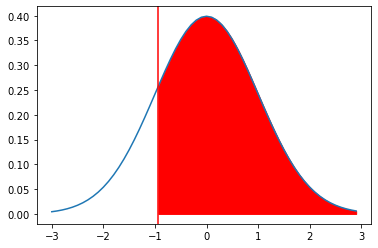

In [64]:
z2 = (3.6 - 5)/1.5

p = stats.norm.sf(z2)

print("Proportion of the gunny bags have a breaking strength at least 3.6 kg per sq cm is- {:0.2f}%".format(p*100))

x = np.arange(-3,3,0.1)
y = stats.norm.pdf(x)
v = np.linspace(z2,x.max())
plt.plot(x,y)
plt.axvline(z2, c = 'r')
plt.fill_between(v,stats.norm.pdf(v), color = 'r')
plt.show()

### 4.3 What proportion of the gunny bags have a breaking strength between 5 and 5.5 kg per sq cm.?

Proportion of the gunny bags having a breaking strength between 5 and 5.5 kg per sq cm is - 13.06%


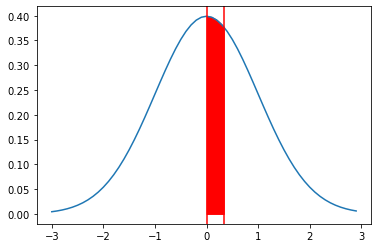

In [65]:
z1 = (5.5-5)/1.5
z2 = (5-5)/1.5
a = stats.norm.cdf(z1)
b = stats.norm.cdf(z2)
p = a-b

print("Proportion of the gunny bags having a breaking strength between 5 and 5.5 kg per sq cm is - {:0.2f}%".format(p*100))

x = np.arange(-3,3,0.1)
y = stats.norm.pdf(x)
v = np.linspace(z1,z2)
plt.plot(x,y)
plt.axvline(z1,c = 'r')
plt.axvline(z2,c = 'r')
plt.fill_between(v,stats.norm.pdf(v),color = 'r')
plt.show()

### 4.4 What proportion of the gunny bags have a breaking strength NOT between 3 and 7.5 kg per sq cm.? 

Proportion of the gunny bags have a breaking strength NOT between 3 and 7.5 kg per sq cm is - 13.90%


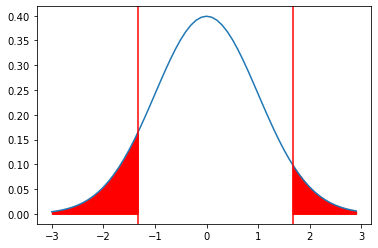

In [66]:
#4.4
z1 = (3-5)/1.5
z2 = (7.5-5)/1.5
a = stats.norm.cdf(z1)
b = 1 - stats.norm.cdf(z2)
p = a+b

print("Proportion of the gunny bags have a breaking strength NOT between 3 and 7.5 kg per sq cm is - {:0.2f}%".format(p*100))

x = np.arange(-3,3,0.1)
y = stats.norm.pdf(x)
v1 = np.linspace(x.min(),z1)
v2 = np.linspace(z2,x.max())
plt.plot(x,y)
plt.axvline(z1, c = 'r')
plt.axvline(z2, c = 'r')
plt.fill_between(v1,stats.norm.pdf(v1),color = 'r')
plt.fill_between(v2,stats.norm.pdf(v2),color = 'r')
plt.show()

# PROBLEM 5

## Grades of the final examination in a training course are found to be normally distributed, with a mean of 77 and a standard deviation of 8.5. Based on the given information answer the questions below. 

### 5.1 What is the probability that a randomly chosen student gets a grade below 85 on this exam?

Mean = 77
SD = 8.5

In [67]:
z = (85-77)/8.5

p = stats.norm.cdf(z)

print("Probability that a randomly chosen student gets a grade below 85 on this exam - {:0.2f}%".format(p*100))

Probability that a randomly chosen student gets a grade below 85 on this exam - 82.67%


### 5.2 What is the probability that a randomly selected student scores between 65 and 87?

In [68]:
z1 = (87-77)/8.5
z2 = (65-77)/8.5
a = stats.norm.cdf(z1)
b = stats.norm.cdf(z2)
p = a-b

print("Probability that a randomly selected student scores between 65 and 87 - {:0.2f}%".format(p*100))

Probability that a randomly selected student scores between 65 and 87 - 80.13%


### 5.3 What should be the passing cut-off so that 75% of the students clear the exam? 

In [69]:
cut_off = stats.norm.ppf(0.25, loc = 77, scale = 8.5)

print("Passing cut off score so that 75% of the students clear the exam is - {:0.2f}".format(cut_off))

Passing cut off score so that 75% of the students clear the exam is - 71.27


# THE END